<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.767994  31.185492  20.784129  ...   87.201886   86.206844  0.995042
      1.0    74.907063  79.029271  67.977870  ...  230.585926  232.050244 -1.464317
      2.0    27.129189  43.359219  85.352320  ...  166.137358  166.087973  0.049386
      3.0    77.659046  51.885681  28.366975  ...  166.800139  167.226483 -0.426345
      4.0    27.651915  91.679287  92.014349  ...  221.982578  222.389773 -0.407195
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.469248  28.265622  37.635560  ...  117.702257  118.440149 -0.737892
      26.0   90.955938  37.827941  64.491238  ...  201.487115  203.053259 -1.566144
      27.0   37.346002  71.405708  61.226719  ...  180.963472  180.088958  0.874514
      28.0   86.769203  40.527873  60.374476  ...  196.597711  197.467855 -0.870144
      29.0   23.435685  96.033854  23.894682  ...  152.989434  153.472613 -0.483179

[30000 rows x 7 columns]

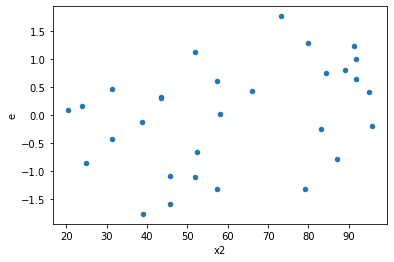

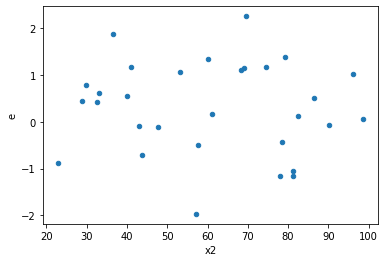

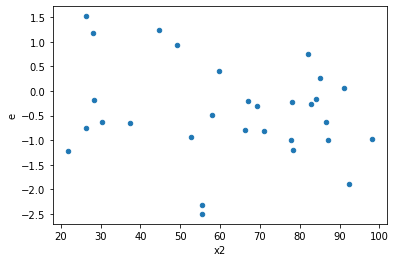

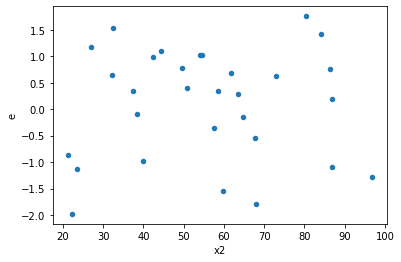

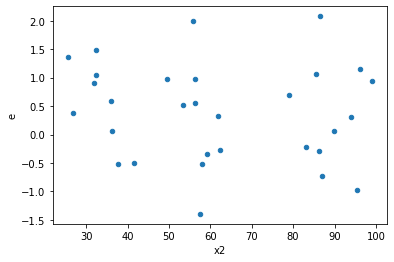

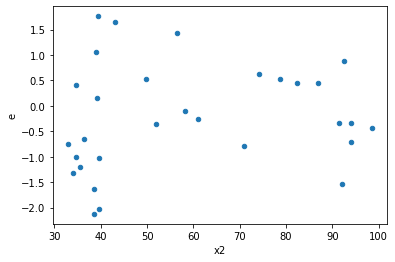

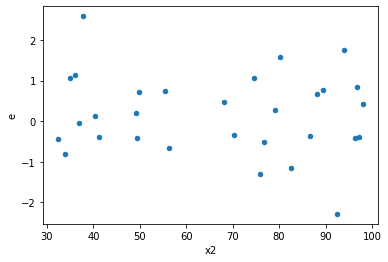

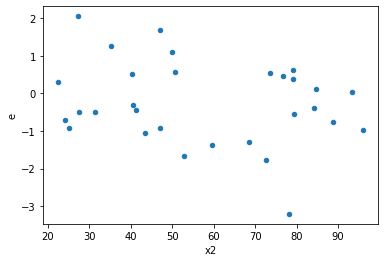

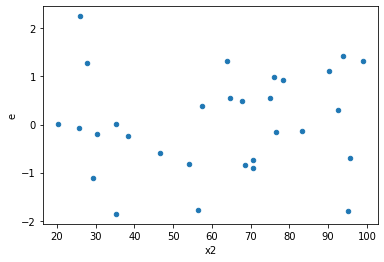

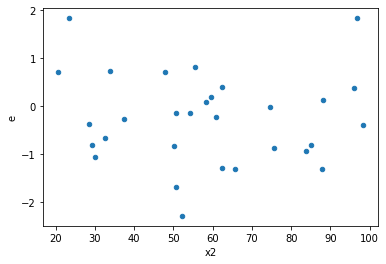

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,2.515357428241809,7.623222729355217,0.2794841586935343,0.8470247477061352,3.0306717620977297,0.11409904507248303,0.9429504774637585,0.057049522536241515,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,6.009668272720676,9.705825539981848,0.6677409191911862,1.0784250599979832,1.6150351566057177,0.48632423109109624,0.7568378844544519,0.24316211554554812,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,7.3055669527798415,10.831331041715487,0.8117296614199824,1.2034812268572763,1.4826133429102388,0.5667988392865717,0.7166005803567141,0.28339941964328585,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,8.010163701449372,11.441800865017997,0.8900181890499302,1.2713112072242219,1.428410366063767,0.6038360210107383,0.6980819894946309,0.30191801050536915,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,9.706603907981615,14.197783616128124,1.0785115453312906,1.5775315129031249,1.4626932087394098,0.5801170992357543,0.7099414503821229,0.29005854961787714,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,5.632481364959609,5.9984135334147295,0.6258312627732898,0.6664903926016366,1.0649681986933204,0.9268342129783889,0.5365828935108056,0.46341710648919443,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,4.840398609140876,8.14288724584193,0.5378220676823195,0.9047652495379922,1.6822761725582789,0.4503696525677443,0.7748151737161278,0.22518482628387215,Reject001=1 : Homoscedasticity
20.0,9.0,9.0,3.029094819047847,9.041406480058548,0.3365660910053163,1.0046007200065052,2.984854228795844,0.1189305134314389,0.9405347432842805,0.05946525671571945,Reject001=1 : Homoscedasticity
21.0,9.0,9.0,2.9979490785808744,3.741356639331987,0.3331054531756527,0.4157062932591097,1.2479720439758157,0.7467897976657043,0.6266051011671478,0.37339489883285215,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2.515357428241809,7.623222729355217,0.2794841586935343,0.8470247477061352,3.0306717620977297,0.11409904507248303,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,6.009668272720676,9.705825539981848,0.6677409191911862,1.0784250599979832,1.6150351566057177,0.48632423109109624,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,15.634067784565348,5.324680540975606,1.7371186427294831,0.5916311712195118,0.3405819019303709,0.12433683280608573,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,7.3055669527798415,10.831331041715487,0.8117296614199824,1.2034812268572763,1.4826133429102388,0.5667988392865717,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,5.634553562711862,4.604347756952333,0.6260615069679847,0.5115941952169258,0.8171628338796552,0.768488829367265,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,11.902404219357264,5.224772896602028,1.3224893577063626,0.5805303218446698,0.4389678589561605,0.23587655409432992,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,8.740415635653545,7.612032524014421,0.9711572928503939,0.8457813915571579,0.8709005202182526,0.840233690063213,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,8.010163701449372,11.441800865017997,0.8900181890499302,1.2713112072242219,1.428410366063767,0.6038360210107383,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,9.999846221903272,9.802803184808932,1.111094024655919,1.0892003538676591,0.9802953932768741,0.9768362068754181,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64